In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import refspec

In [2]:
filename="adc_waveform.bin"
cfg = refspec.SpecConfig()
cfg.Ntaps           = 8
cfg.Nchannels       = 1
cfg.Average1Size    = 64
cfg.Average2Size    = 700
fundamental         = cfg.fundamental_frequency()
blocks              = cfg.AverageSize()+2*cfg.Ntaps

In [3]:
signal = refspec.FileStreamSource(cfg.Nfft,cfg.Nchannels,filename)
output = refspec.SpecOutput(cfg)
spectrometer = refspec.RefSpectrometer(signal, cfg)
spectrometer.run(output)
f = fundamental*np.arange(cfg.Nbins())/1e6
Pk = np.array([output.get_avg_pspec(0, i) for i in range(0, cfg.Nbins())])

Read 204800000 records from adc_waveform.bin


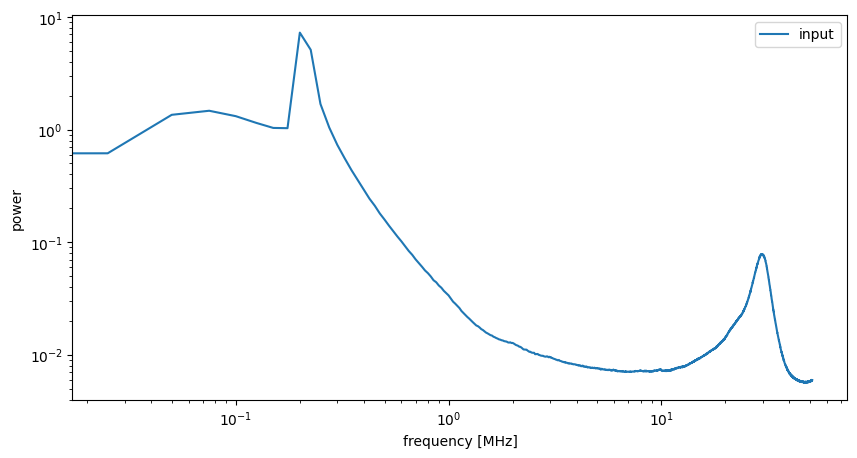

In [4]:
plt.figure(figsize=(10,5))
plt.plot(f,Pk,label='input')
plt.xlabel('frequency [MHz]')
plt.ylabel('power')
plt.loglog()
plt.legend()

In [5]:
data=np.fromfile(filename,dtype=np.int16)
print(len(data)/102.4e6)

2.0


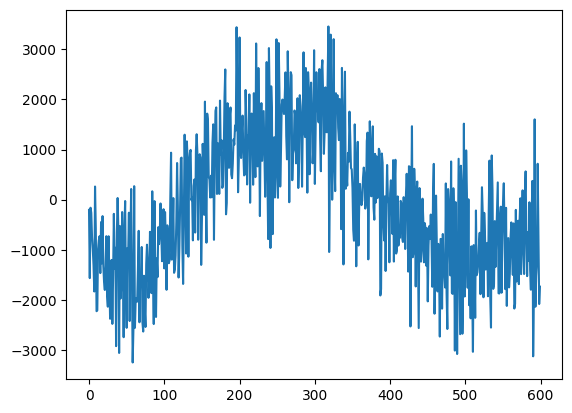

In [6]:
plt.plot(data[:600])

In [22]:
open('test.bin','wb').write(data.tobytes())
data2=np.fromfile('test.bin',dtype=np.int16)

In [26]:
np.all(data==data2)

True